In [1]:
import json
import pickle
import time
import datetime
import logging
import cv2

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
import torchvision as tv
from torch.optim import Adam

import get_data_loaders, get_Image_Transform_Network, get_VGG_network, utils

In [2]:
with open('test_net_model.pickle', 'rb') as f:
    test_net = pickle.load(f)

In [3]:
try:
    with open('dataloader_pickled.pickle', 'rb') as f:
        test_train_loader = pickle.load(f)
except:
    #Using COCO dataset. Use the first time, and then pickle it 
    train_loader = get_data_loaders.get_classic_dataset(image_size=TRAIN_IMAGE_SIZE, batch_size= BATCH_SIZE)
    #Pickling
    test_train_loader = get_data_loaders.get_classic_dataset()
    with open("dataloader_pickled.pickle","wb") as f:
        pickle.dump(test_train_loader,f, protocol=pickle.HIGHEST_PROTOCOL)


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


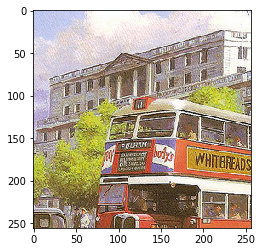

In [5]:
#for testing
for x, _ in test_train_loader:
    test_new_content = x.to(device)
    break

img_output = test_net(test_new_content)
plt.imshow(utils.get_numpy_image_to_plot(test_new_content.cpu().detach().numpy())[0])

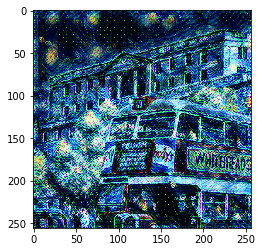

In [6]:
plt.imshow(utils.get_numpy_image_to_plot(img_output.cpu().detach().numpy())[0])